In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [78]:
pca = PCA(svd_solver='auto')

In [79]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4b/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4b/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [80]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,...,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,27,0.333333,0,0,,0,,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,...,0,27,1.000000,0,0,,0,,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,...,1,24,0.800000,0,0,,0,,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,38,1.000000,0,0,,0,,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,...,1,13,0.600000,0,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,...,1,16,0.200000,0,0,,0,,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,23,1.000000,0,0,,0,,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,19,0.666667,0,0,,0,,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,22,0.400000,0,0,,0,,1.000000,NO


In [81]:
train=train.drop(["verbH","verbT"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,negH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,0,0,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,0,0,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,0.800000,0,0,0,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,0,0,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.600000,0,0,0,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.200000,0,0,0,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,0,0,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,0,0,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.400000,0,0,0,1.000000,NO


In [82]:
train_entailment=train[train["clases"]=="YES"]

In [83]:
train_noentailment=train[train["clases"]!="YES"]

In [84]:
X_ent = train_entailment.drop(['clases'],axis=1)
y_ent = train_entailment['clases']

In [85]:
X_noent = train_noentailment.drop(['clases'],axis=1)
y_noent = train_noentailment['clases']

In [44]:
# # RTE3
# y_t=[]
# for i in y_:
#     if i == "YES":
#         y_t.append(1)
#     elif i == "UNKNOWN":
#         y_t.append(2)
#     else:
#         y_t.append(0)

In [86]:
train_entailment

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,negH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,0,0,0.500000,YES
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,0,0,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.600000,0,0,0,0.666667,YES
6,0.000000,0.000000,1.537,0.000,0.000000,0.000000,0.000000,0,0.000000,0,7,0,20,0.571429,0,0,0,0.250000,YES
12,0.000000,0.000000,1.957,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,21,1.000000,0,0,0,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,2.019526,1.452324,2.180,2.017,3.949004,0.003593,0.378576,1,0.055556,0,6,1,18,0.833333,0,1,0,0.250000,YES
793,0.000000,0.000000,1.974,0.000,0.000000,0.000000,0.000000,1,0.000000,0,4,0,24,1.000000,0,0,0,0.000000,YES
794,2.117322,1.436944,1.805,1.675,3.965707,0.004654,0.309267,1,0.037037,0,13,1,27,0.769231,0,0,0,0.600000,YES
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,0,0,0.666667,YES


In [87]:
train_noentailment

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,negH,overlap_ent,clases
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,0,0,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,0.800000,0,0,0,0.250000,UNKNOWN
5,0.000000,0.000000,1.948,0.000,0.000000,0.000000,0.000000,1,0.000000,0,6,0,22,0.500000,0,0,0,1.000000,UNKNOWN
7,0.594194,2.431672,1.096,0.972,1.967794,0.002040,0.371910,1,0.133333,0,6,2,15,0.333333,0,0,0,0.000000,NO
8,0.000000,0.000000,1.806,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,23,1.000000,0,0,0,0.000000,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,0.000000,0.000000,2.226,0.000,0.000000,0.000000,0.000000,0,0.000000,0,2,0,10,1.000000,0,0,0,0.000000,UNKNOWN
792,0.823321,4.355468,1.616,1.579,3.954999,0.003868,0.193770,0,0.176471,0,5,3,17,0.200000,0,0,0,0.250000,UNKNOWN
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.200000,0,0,0,0.500000,UNKNOWN
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,0,0,0.500000,UNKNOWN


In [88]:
scaler = preprocessing.MaxAbsScaler().fit(X_ent)
X_scaled = scaler.transform(X_ent)
X_ent = X_scaled

In [89]:
scaler = preprocessing.MaxAbsScaler().fit(X_noent)
X_scaled = scaler.transform(X_noent)
X_noent = X_scaled

In [91]:
Y_pca = pca.fit_transform(X_ent)
Y_pca2 = pca.fit_transform(X_noent)

In [94]:
pca_vr=pca.explained_variance_ratio_
print(pca_vr)

[4.25612393e-01 1.08250113e-01 9.88415006e-02 7.06479926e-02
 5.85859089e-02 5.38677386e-02 4.50619647e-02 3.58511546e-02
 2.60217689e-02 2.33312651e-02 1.48880691e-02 1.15027658e-02
 9.20266578e-03 6.73047302e-03 5.61906355e-03 3.85943208e-03
 2.08363806e-03 4.20926992e-05]


In [95]:
pca_vr=pca.explained_variance_ratio_
print(pca_vr)

[4.25612393e-01 1.08250113e-01 9.88415006e-02 7.06479926e-02
 5.85859089e-02 5.38677386e-02 4.50619647e-02 3.58511546e-02
 2.60217689e-02 2.33312651e-02 1.48880691e-02 1.15027658e-02
 9.20266578e-03 6.73047302e-03 5.61906355e-03 3.85943208e-03
 2.08363806e-03 4.20926992e-05]


In [96]:
def distribucion_vr(D,titulo='Distribucion de Varianzas'):
    
    d=[]
    y=0
    for x in D:
        y+=x
        d.append(y)
    
    """Areas de Graficacion y visualizacion de los datos"""
    fig,ax = plt.subplots(figsize=(8,5))
    
    pasos=range(len(D))
    datos=np.array(list(map(lambda x,y:[x,y],pasos,d)))
    ax.plot(datos[:,0],datos[:,1],
            ls='--',
            color='green',
            linewidth=1,
            label='Contribucion acumulada')
    plt.title(titulo)
    plt.xlabel('Componente')
    plt.ylabel('Proporción')
    plt.grid(True)
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    ax.grid(which='major', color='gray', linestyle='-')
    ax.grid(which='minor', color='grey', linestyle='--')
    ax.legend()

    return ax

<Axes: title={'center': 'Distribucion de Varianzas'}, xlabel='Componente', ylabel='Proporción'>

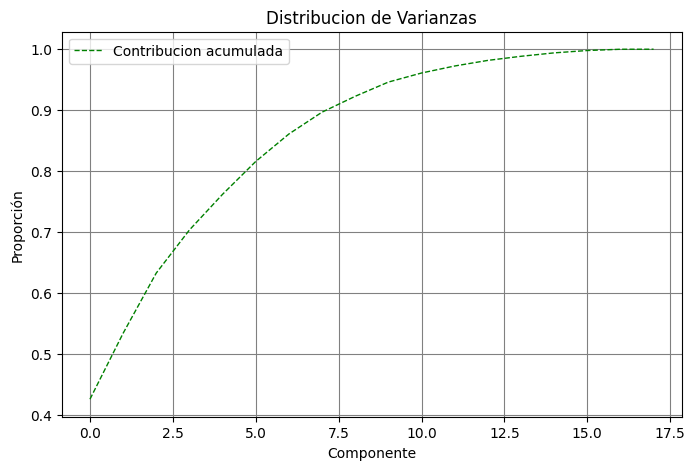

In [97]:
distribucion_vr(pca_vr)

# PCA vs LDA

In [98]:
pca = PCA(n_components=2)
X_r = pca.fit(X_ent).transform(X_ent)

In [58]:
# lda = LinearDiscriminantAnalysis(n_components=2)
# X_r2 = lda.fit(X, y_).transform(X)

In [100]:
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

explained variance ratio (first two components): [0.50672297 0.10464078]


In [101]:
len(X_r)

412

<Figure size 640x480 with 0 Axes>

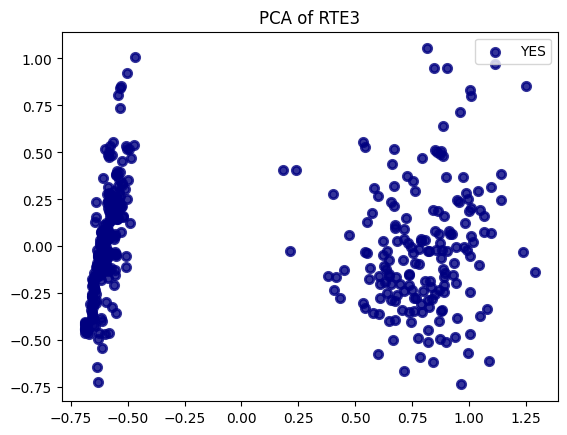

<Figure size 640x480 with 0 Axes>

In [108]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2
for color, i, target_name in zip(colors, y_ent.unique(), y_ent.unique()):
    plt.scatter(
        X_r[y_ent == i, 0], X_r[y_ent == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of RTE3")

plt.figure()

In [103]:
pca2 = PCA(n_components=2)
X_r2 = pca2.fit(X_noent).transform(X_noent)

In [105]:
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca2.explained_variance_ratio_)
)

explained variance ratio (first two components): [0.42561239 0.10825011]


In [107]:
len(X_r2)

388

<Figure size 640x480 with 0 Axes>

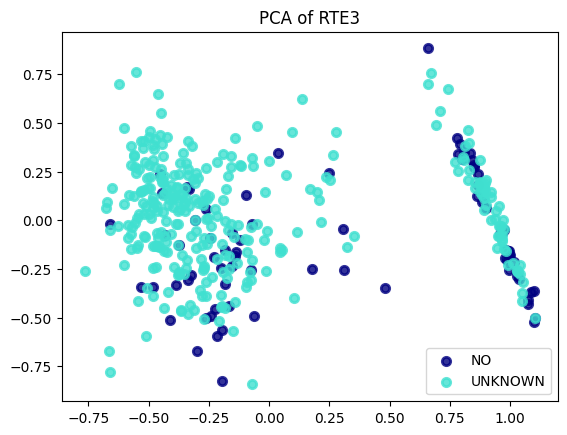

<Figure size 640x480 with 0 Axes>

In [109]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2
for color, i, target_name in zip(colors, y_noent.unique(), y_noent.unique()):
    plt.scatter(
        X_r2[y_noent == i, 0], X_r2[y_noent == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of RTE3")

plt.figure()

# Proyection 3d

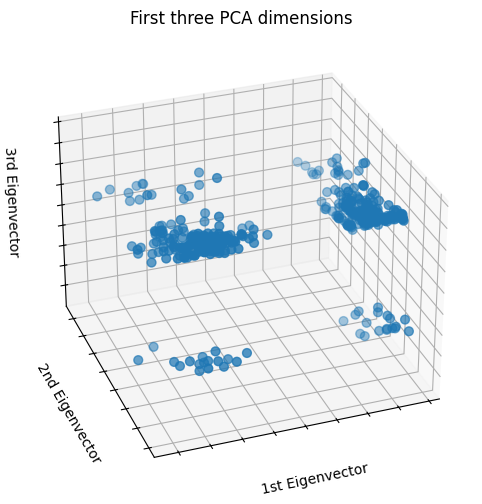

In [117]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X_ent)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

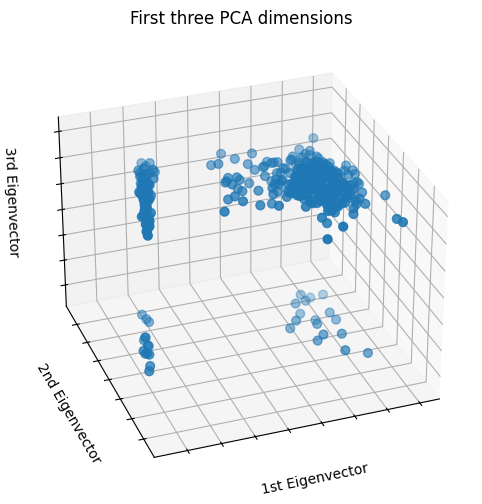

In [118]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X_noent)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()